In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# --- Pandas Display Options ---
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Adjust the display width in characters. You might need to increase this
# value significantly (e.g., 2000, 3000) depending on how many columns
# you have and your screen resolution.
pd.set_option('display.width', 1000)

In [3]:

# Define the path to your data folder relative to the notebook
# The notebook is in 'notebooks/', data is in 'data/'
# So, we need to go up one level (..) and then down into 'data/'
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data'))

# Construct the full path to your train.csv and test.csv
train_file_path = os.path.join(data_path, 'train.csv')
test_file_path = os.path.join(data_path, 'test.csv')

print(f"Loading data from: {train_file_path}")
print(f"Loading data from: {test_file_path}")

# Load the datasets
try:
    df_train = pd.read_csv(train_file_path)
    df_test = pd.read_csv(test_file_path)
except FileNotFoundError as e:
    print(f"Error loading files. Make sure 'train.csv' and 'test.csv' are in your 'data/' folder.")
    print(e)
    exit() # Stop execution if files aren't found



Loading data from: /home/aja/projects/fertpred/data/train.csv
Loading data from: /home/aja/projects/fertpred/data/test.csv


In [4]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
df_train.describe(include='all')

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,750000.000000,750000.000000,750000.000000,750000.000000,750000,750000,750000.000000,750000.000000,750000.000000,750000
unique,NaN,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,Sandy,Paddy,NaN,NaN,NaN,14-35-14
freq,NaN,NaN,NaN,NaN,156710,85754,NaN,NaN,NaN,114436
mean,374999.500000,31.503565,61.038912,45.184147,NaN,NaN,23.093808,9.478296,21.073227,NaN
std,216506.495284,4.025574,6.647695,11.794594,NaN,NaN,11.216125,5.765622,12.346831,NaN
min,0.000000,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,187499.750000,28.000000,55.000000,35.000000,NaN,NaN,13.000000,4.000000,10.000000,NaN
50%,374999.500000,32.000000,61.000000,45.000000,NaN,NaN,23.000000,9.000000,21.000000,NaN
75%,562499.250000,35.000000,67.000000,55.000000,NaN,NaN,33.000000,14.000000,32.000000,NaN


In [6]:
df_train.dtypes


id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [8]:
df_train["Soil Type"].value_counts(normalize=True)

Soil Type
Sandy     0.208947
Black     0.201275
Clayey    0.197843
Red       0.197469
Loamy     0.194467
Name: proportion, dtype: float64

<Axes: xlabel='Soil Type'>

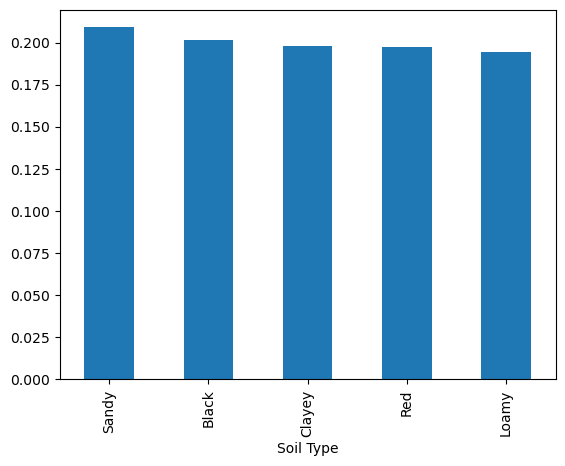

In [9]:
df_train["Soil Type"].value_counts(normalize=True).plot.bar()

In [10]:
df_train["Crop Type"].value_counts(normalize=True)

Crop Type
Paddy          0.114339
Pulses         0.104240
Cotton         0.092228
Tobacco        0.090667
Wheat          0.088837
Millets        0.087055
Barley         0.086727
Sugarcane      0.085692
Oil seeds      0.085579
Maize          0.083425
Ground Nuts    0.081212
Name: proportion, dtype: float64

<Axes: xlabel='Crop Type'>

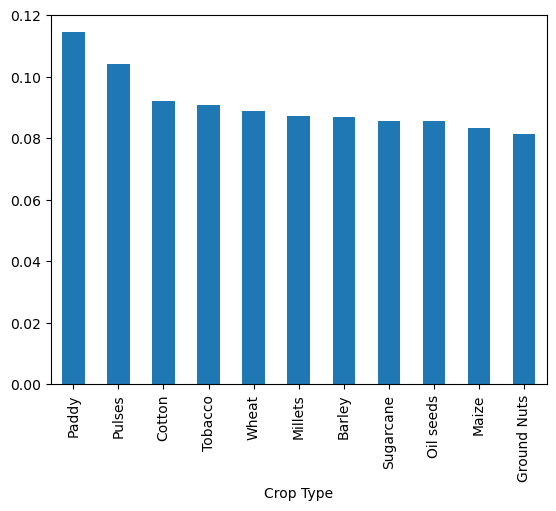

In [11]:
df_train["Crop Type"].value_counts(normalize=True).plot.bar()

In [12]:
df_train['Fertilizer Name'].value_counts(normalize=True)

Fertilizer Name
14-35-14    0.152581
10-26-26    0.151849
17-17-17    0.149937
28-28       0.148211
20-20       0.147852
DAP         0.126480
Urea        0.123089
Name: proportion, dtype: float64

<Axes: xlabel='Fertilizer Name'>

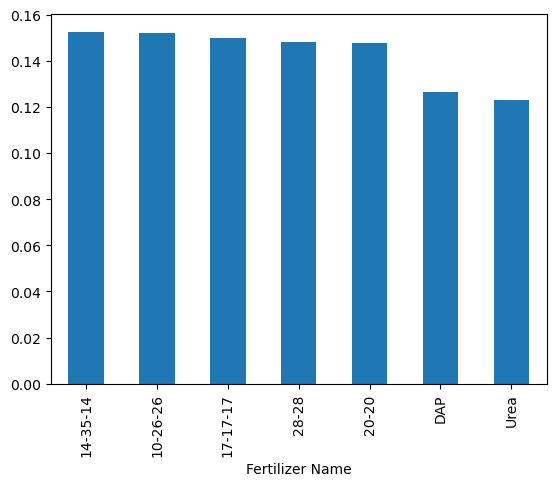

In [13]:
df_train['Fertilizer Name'].value_counts(normalize=True).plot.bar()

In [14]:
pd.crosstab(df_train['Soil Type'], df_train['Fertilizer Name'], normalize='index')


Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
Soil Type,,,,,,,
Black,0.152766,0.156708,0.147752,0.143890,0.140412,0.135808,0.122665
Clayey,0.158995,0.150005,0.153462,0.151690,0.153401,0.116443,0.116005
Loamy,0.156476,0.154755,0.152547,0.151786,0.147563,0.119822,0.117052
Red,0.146689,0.153806,0.149498,0.145940,0.146379,0.128810,0.128877
Sandy,0.144771,0.147865,0.146691,0.146181,0.153143,0.130994,0.130355


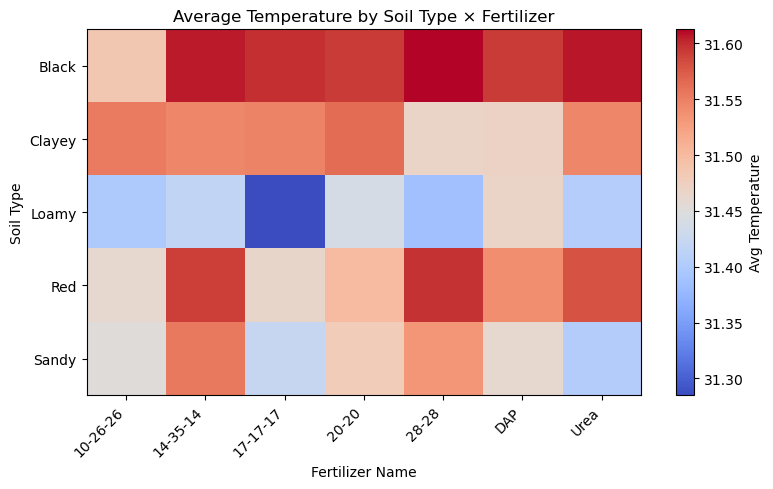

In [15]:
pivot_temp = (
    df_train
    .groupby(['Soil Type','Fertilizer Name'])['Temparature']
    .mean()
    .unstack()  # rows=Soil Type, cols=Fertilizer Name
)

# 2. Plot it
plt.figure(figsize=(8, 5))
plt.imshow(pivot_temp, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Avg Temperature')

plt.xticks(range(pivot_temp.shape[1]), pivot_temp.columns, rotation=45, ha='right')
plt.yticks(range(pivot_temp.shape[0]), pivot_temp.index)

plt.title('Average Temperature by Soil Type × Fertilizer')
plt.xlabel('Fertilizer Name')
plt.ylabel('Soil Type')
plt.tight_layout()
plt.show()

In [16]:
def categorical_entropy(series):
    """Compute Shannon entropy of a pandas Categorical / object series."""
    freqs = series.value_counts(normalize=True)
    # avoid log(0)
    return -(freqs * np.log2(freqs)).sum()

for col in ['Soil Type','Crop Type','Fertilizer Name']:
    print(col, 'entropy =', categorical_entropy(df_train[col]))


Soil Type entropy = 2.3214862582273796
Crop Type entropy = 3.452071727484735
Fertilizer Name entropy = 2.802491136095192


In [17]:
from scipy.stats import chi2_contingency

def chi2_pval(col1, col2, df):
    ct = pd.crosstab(df[col1], df[col2])
    _, p, _, _ = chi2_contingency(ct)
    return p

print("Soil vs Crop p-value:", chi2_pval('Soil Type','Crop Type',df_train))
print("Soil vs Fertilizer p-value:", chi2_pval('Soil Type','Fertilizer Name',df_train))
print("Crop vs Fertilizer p-value:", chi2_pval('Crop Type','Fertilizer Name',df_train))


Soil vs Crop p-value: 3.7428219076854635e-118
Soil vs Fertilizer p-value: 1.6505491634138464e-179
Crop vs Fertilizer p-value: 0.0


In [18]:
def cramers_v(col1, col2, df):
    ct = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k-1)))

pairs = [('Soil Type','Crop Type'),
         ('Soil Type','Fertilizer Name'),
         ('Crop Type','Fertilizer Name')]

for a,b in pairs:
    print(f"Cramér's V {a} vs {b} =", cramers_v(a,b,df_train))

Cramér's V Soil Type vs Crop Type = 0.015098820481077987
Cramér's V Soil Type vs Fertilizer Name = 0.017543596192475575
Cramér's V Crop Type vs Fertilizer Name = 0.02622324144657948


In [19]:
from sklearn.metrics import mutual_info_score

def mutual_info(col1, col2, df):
    return mutual_info_score(df[col1], df[col2])

for a,b in pairs:
    print(f"Mutual Info {a} vs {b} =", mutual_info(a,b,df_train))


Mutual Info Soil Type vs Crop Type = 0.000456399612254077
Mutual Info Soil Type vs Fertilizer Name = 0.0006169379749114967
Mutual Info Crop Type vs Fertilizer Name = 0.002088466506260253


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# 1. Prepare X and y
num_cols = ['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
X = df_train[num_cols]
y = LabelEncoder().fit_transform(df_train['Fertilizer Name'])

# 2. Compute mutual info
mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=num_cols).sort_values(ascending=False)

print("Mutual Information (feature → fertilizer):")
print(mi_series)

Mutual Information (feature → fertilizer):
Moisture       0.004471
Phosphorous    0.004455
Potassium      0.003536
Nitrogen       0.003446
Temparature    0.003085
Humidity       0.000368
dtype: float64


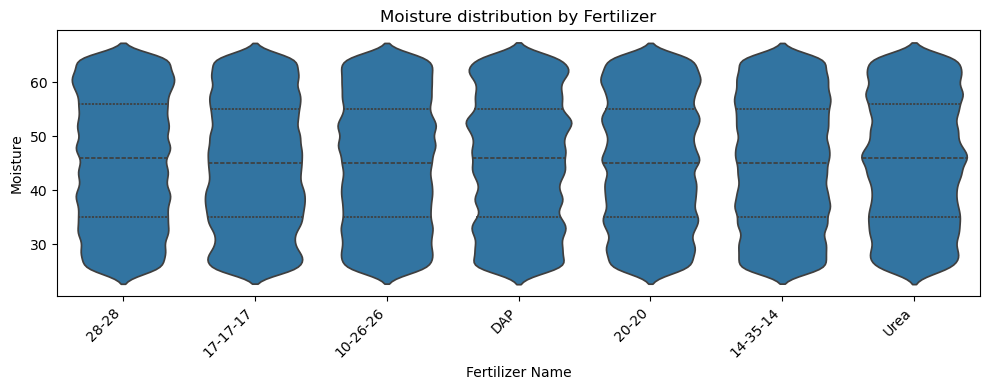

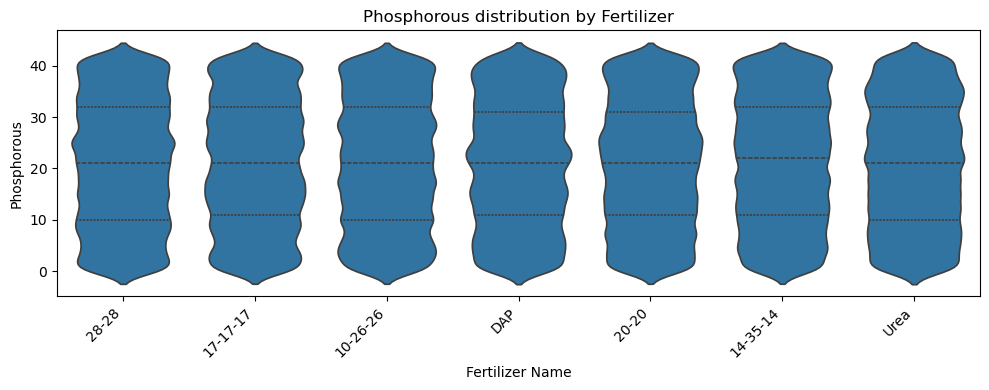

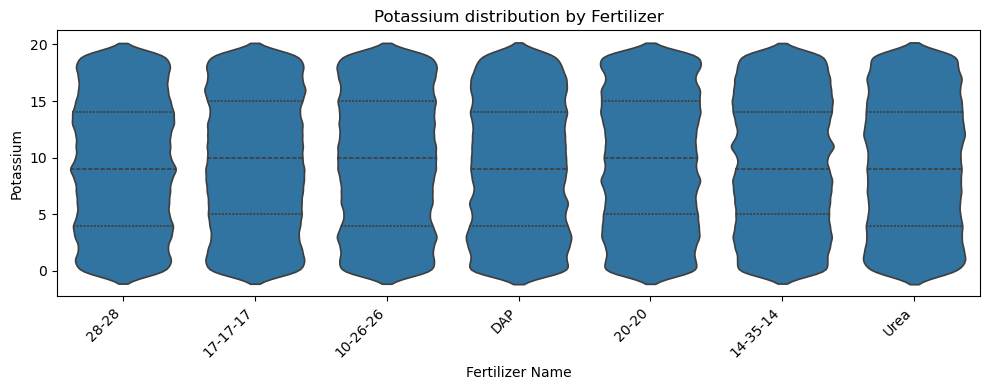

In [21]:
top_feats = mi_series.index[:3]  # e.g. ['Nitrogen','Moisture','Temparature']
for col in top_feats:
    plt.figure(figsize=(10, 4))
    sns.violinplot(x='Fertilizer Name', y=col, data=df_train, inner='quartile')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{col} distribution by Fertilizer")
    plt.tight_layout()
    plt.show()


In [22]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=num_cols).sort_values(ascending=False)

print("SelectKBest MI scores:")
print(scores)


SelectKBest MI scores:
Moisture       0.003847
Phosphorous    0.003451
Humidity       0.002762
Nitrogen       0.002734
Temparature    0.002415
Potassium      0.001589
dtype: float64


In [23]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


In [24]:
y_true = ["a", "b", "c"]
y_pred = [["a", "b", "c", "d"], ["a", "b", "c", "d"], ["a", "b", "c", "d"]]

print(mapk(y_true, y_pred, 3))
apk(y_true[0], y_pred[0], 3), apk(y_true[1], y_pred[1], 3), apk(y_true[2], y_pred[2], 3)


0.611111111111111


(1.0, 0.5, 0.3333333333333333)

In [25]:
def compare_distributions(train, test, features=None):
    palette = sns.color_palette('Set1', 2)
    
    if features is None:
        features = train.select_dtypes(include='number').columns
        features = [col for col in features if col != 'id']

    n_cols = 3
    n_rows = math.ceil(len(features) / n_cols)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    ax = ax.flatten()

    handles, labels = [], []
    for i, column in enumerate(features):
        sns.kdeplot(train[column].dropna(), label='Train', ax=ax[i], color=palette[0])
        sns.kdeplot(test[column].dropna(), label='Test', ax=ax[i], color=palette[1])
        ax[i].set_title(f'{column} Distribution')
        ax[i].set_xlabel(None)
        
        h, l = ax[i].get_legend_handles_labels()
        if not handles:  # capture only once
            handles, labels = h, l
        ax[i].legend().remove()

    for i in range(len(features), len(ax)):
        ax[i].axis('off')
    
    fig.suptitle('Feature Distributions: Train vs Test', fontsize=24, fontweight='bold')
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=14)
    plt.tight_layout()
    plt.show()


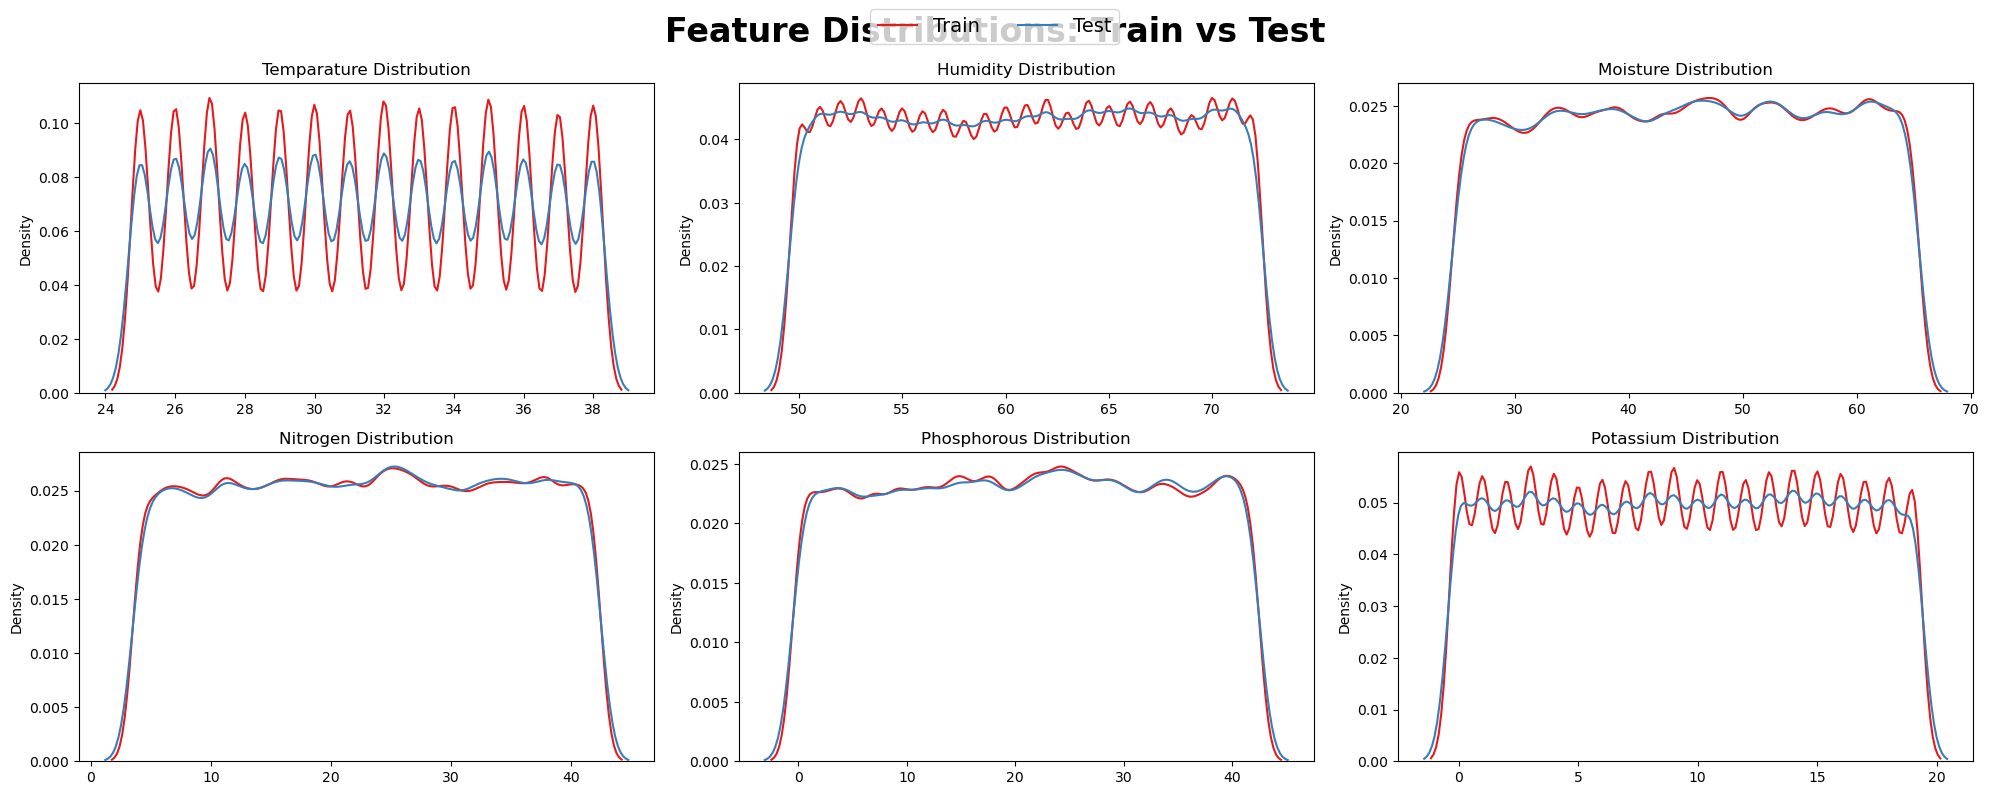

In [26]:
compare_distributions(df_train, df_test, features=[
    'Temparature', 'Humidity', 'Moisture', 
    'Nitrogen', 'Phosphorous', 'Potassium'
])


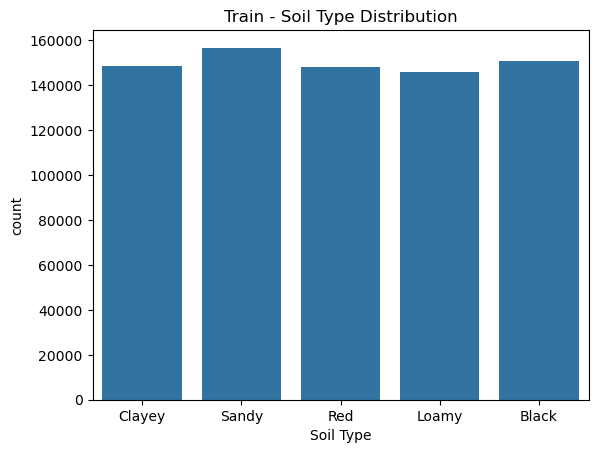

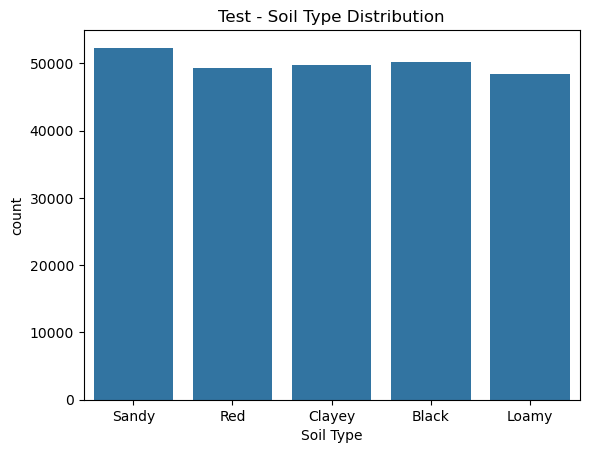

In [27]:
# For Soil Type
sns.countplot(data=df_train, x='Soil Type')
plt.title('Train - Soil Type Distribution')
plt.show()

sns.countplot(data=df_test, x='Soil Type')
plt.title('Test - Soil Type Distribution')
plt.show()


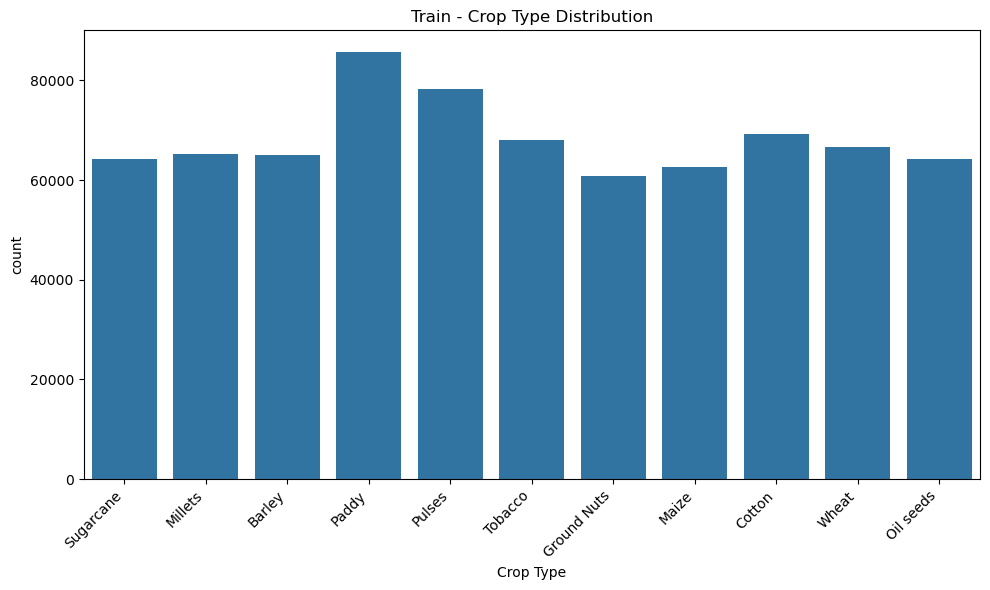

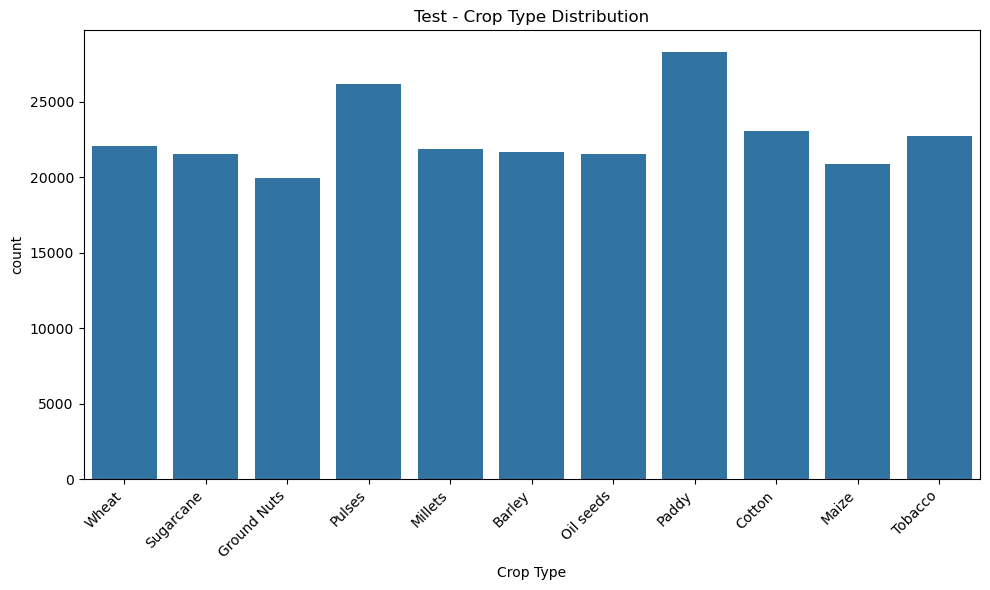

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Crop Type')
plt.title('Train - Crop Type Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Crop Type')
plt.title('Test - Crop Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



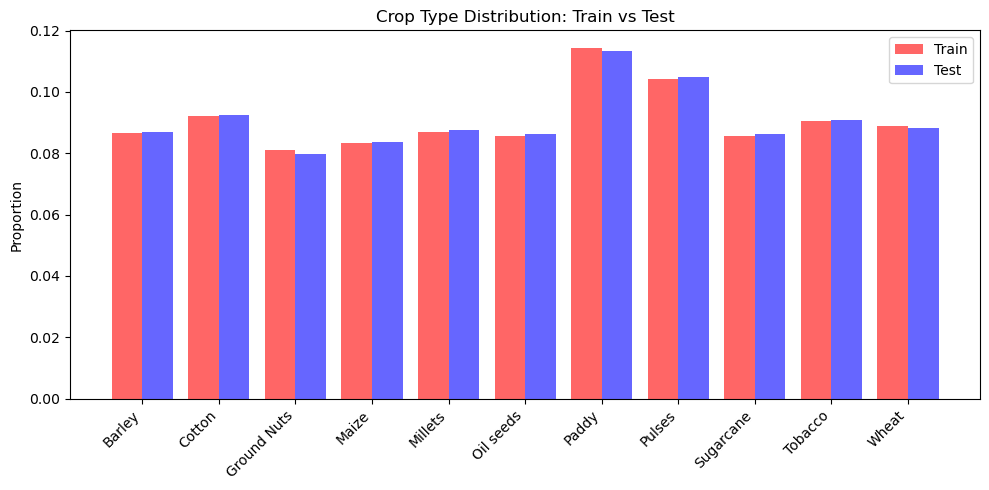

In [29]:


def plot_overlap_categorical(col, df_train, df_test, title):
    # Get normalized counts
    train_counts = df_train[col].value_counts(normalize=True).sort_index()
    test_counts = df_test[col].value_counts(normalize=True).sort_index()
    
    # Union of all categories
    categories = sorted(set(train_counts.index).union(test_counts.index))
    x = range(len(categories))
    width = 0.4

    # Prepare values for each category
    train_vals = [train_counts.get(cat, 0) for cat in categories]
    test_vals = [test_counts.get(cat, 0) for cat in categories]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(x, train_vals, width=width, color='red', alpha=0.6, label='Train')
    plt.bar([i + width for i in x], test_vals, width=width, color='blue', alpha=0.6, label='Test')
    plt.xticks([i + width / 2 for i in x], categories, rotation=45, ha='right')
    plt.ylabel('Proportion')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 👉 Plot for Crop Type
plot_overlap_categorical('Crop Type', df_train, df_test, 'Crop Type Distribution: Train vs Test')




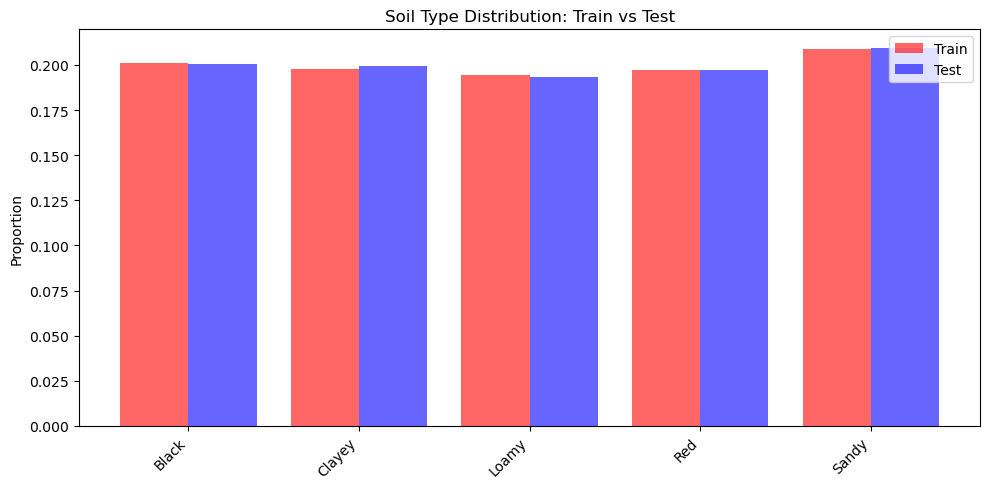

In [30]:
# 👉 Plot for Soil Type
plot_overlap_categorical('Soil Type', df_train, df_test, 'Soil Type Distribution: Train vs Test')

In [31]:
numerical_features = df_train.select_dtypes(include='number')
correlation_matrix = numerical_features.corr(method='pearson') 

In [32]:
print(numerical_features)

            id  Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
0            0           37        70        36        36          4            5
1            1           27        69        65        30          6           18
2            2           29        63        32        24         12           16
3            3           35        62        54        39         12            4
4            4           35        58        43        37          2           16
...        ...          ...       ...       ...       ...        ...          ...
749995  749995           25        69        30         8         16            6
749996  749996           37        64        58        38          8           20
749997  749997           35        68        59         6         11           29
749998  749998           31        68        29         9         11           12
749999  749999           33        55        29         4         10            9

[750000 rows x 

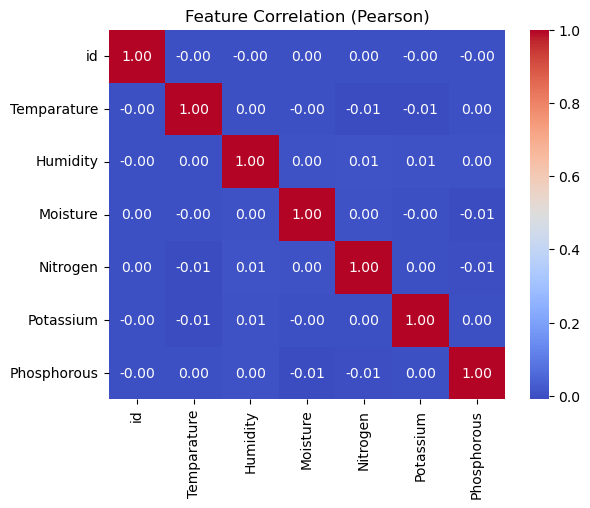

In [33]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation (Pearson)')
plt.show()

In [34]:
df_corr = df_train.drop(columns='id').select_dtypes(include='number').corr(method='spearman')


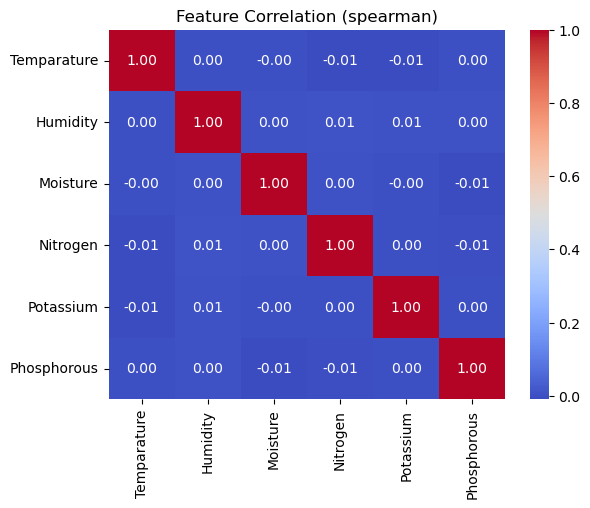

In [35]:
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation (spearman)')
plt.show()

<Axes: title={'center': 'Class Distribution'}, xlabel='Fertilizer Name'>

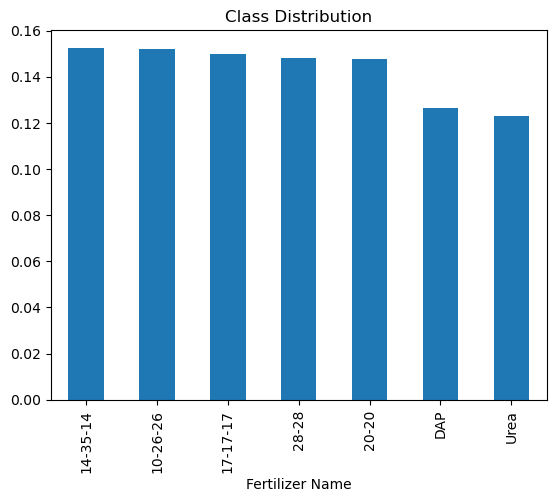

In [36]:
df_train['Fertilizer Name'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')


In [37]:

# Create color map
cm = sns.light_palette('#91013E', as_cmap=True)

# Top 5 value counts for each feature
counts_tr = pd.Series({ft: [df_train[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in df_train.columns}, name='top_5_counts_train')
counts_te = pd.Series({ft: [df_test[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in df_test.columns}, name='top_5_counts_test')

# Number of unique values
nunique_tr = df_train.nunique().rename('nunique_train')
nunique_te = df_test.nunique().rename('nunique_test')

# Describe-based stats
min_max = df_train.describe().T[['min', 'max']].add_suffix('_train').join(
    df_test.describe().T[['min', 'max']].add_suffix('_test'),
    how='outer'
)

# Combine stats
stats_pivot = pd.concat([min_max, nunique_tr, nunique_te, counts_tr, counts_te], axis=1)

# Optional: styling if you're using a Jupyter notebook
def stylize_table(df):
    return df.style.background_gradient(cmap=cm, subset=['min_train', 'max_train', 'min_test', 'max_test'])

# Display (Jupyter) or just print
stylize_table(stats_pivot)


,min_train,max_train,min_test,max_test,nunique_train,nunique_test,top_5_counts_train,top_5_counts_test
Humidity,50.000000,72.000000,50.000000,72.000000,23,23.000000,"[{70: 33745, 53: 33640, 62: 33617, 71: 33525, 64: 33446}]","[{71: 11262, 66: 11242, 64: 11204, 70: 11175, 62: 11141}]"
Moisture,25.000000,65.000000,25.000000,65.000000,41,41.000000,"[{61: 19809, 48: 19386, 47: 19299, 53: 19270, 46: 19180}]","[{61: 6537, 53: 6515, 46: 6396, 45: 6368, 51: 6359}]"
Nitrogen,4.000000,42.000000,4.000000,42.000000,39,39.000000,"[{25: 20484, 11: 20283, 38: 20269, 26: 20177, 24: 20122}]","[{25: 6938, 26: 6808, 11: 6745, 24: 6692, 38: 6675}]"
Phosphorous,0.000000,42.000000,0.000000,42.000000,43,43.000000,"[{24: 19137, 22: 18633, 18: 18560, 15: 18540, 39: 18385}]","[{24: 6292, 22: 6191, 39: 6141, 34: 6097, 17: 6086}]"
Potassium,0.000000,19.000000,0.000000,19.000000,20,20.000000,"[{0: 39060, 3: 38762, 9: 38533, 14: 38292, 11: 38207}]","[{0: 12993, 3: 12862, 14: 12853, 8: 12761, 11: 12699}]"
Temparature,25.000000,38.000000,25.000000,38.000000,14,14.000000,"[{27: 55228, 35: 54855, 32: 54656, 30: 53867, 34: 53788}]","[{27: 18592, 35: 18342, 32: 18209, 30: 18163, 29: 17926}]"
id,0.000000,749999.000000,750000.000000,999999.000000,750000,250000.000000,"[{749983: 1, 749982: 1, 749981: 1, 749980: 1, 749979: 1}]","[{999983: 1, 999982: 1, 999981: 1, 999980: 1, 999979: 1}]"
Soil Type,nan,nan,nan,nan,5,5.000000,"[{'Sandy': 156710, 'Black': 150956, 'Clayey': 148382, 'Red': 148102, 'Loamy': 145850}]","[{'Sandy': 52323, 'Black': 50147, 'Clayey': 49792, 'Red': 49359, 'Loamy': 48379}]"
Crop Type,nan,nan,nan,nan,11,11.000000,"[{'Paddy': 85754, 'Pulses': 78180, 'Cotton': 69171, 'Tobacco': 68000, 'Wheat': 66628}]","[{'Paddy': 28332, 'Pulses': 26221, 'Cotton': 23091, 'Tobacco': 22728, 'Wheat': 22094}]"
Fertilizer Name,nan,nan,nan,nan,7,nan,"[{'14-35-14': 114436, '10-26-26': 113887, '17-17-17': 112453, '28-28': 111158, '20-20': 110889}]",nan


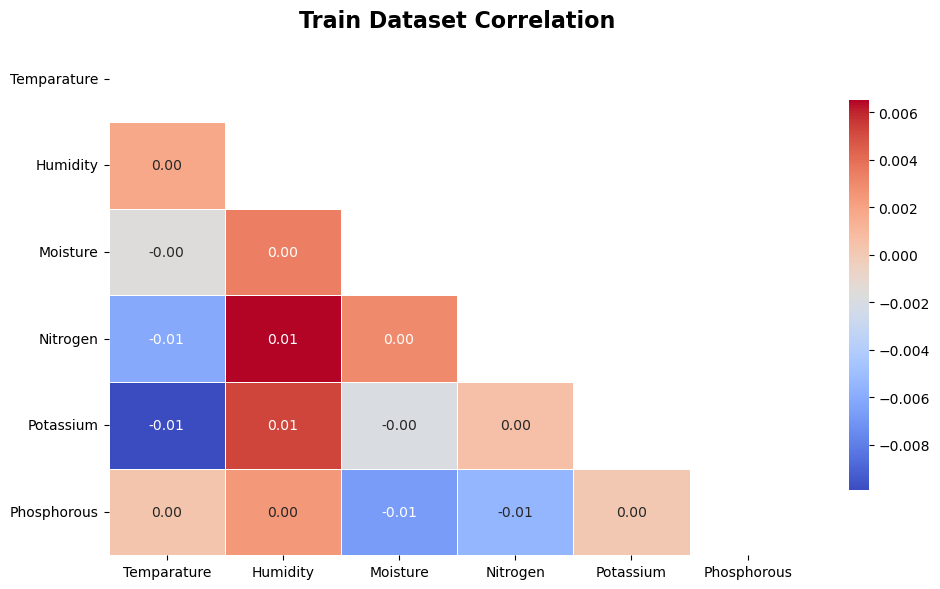

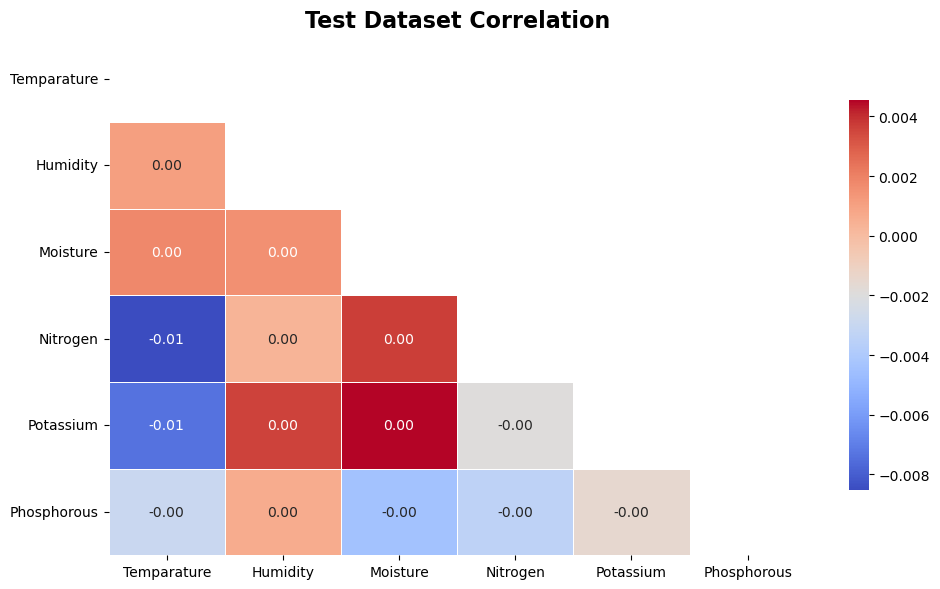

In [38]:
def plot_correlation_heatmap(df: pd.DataFrame, title_name: str = 'Train Correlation') -> None:
    df = df.select_dtypes(include=[np.number]).drop(columns='id', errors='ignore')  # Drop ID if present
    corr = df.corr()

    fig, ax = plt.subplots(figsize=(10, 6))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
                linewidths=0.5, cbar_kws={"shrink": .75}, ax=ax)
    ax.set_title(title_name, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(df_train.select_dtypes(include=[np.number]), 'Train Dataset Correlation')
plot_correlation_heatmap(df_test.select_dtypes(include=[np.number]), 'Test Dataset Correlation')

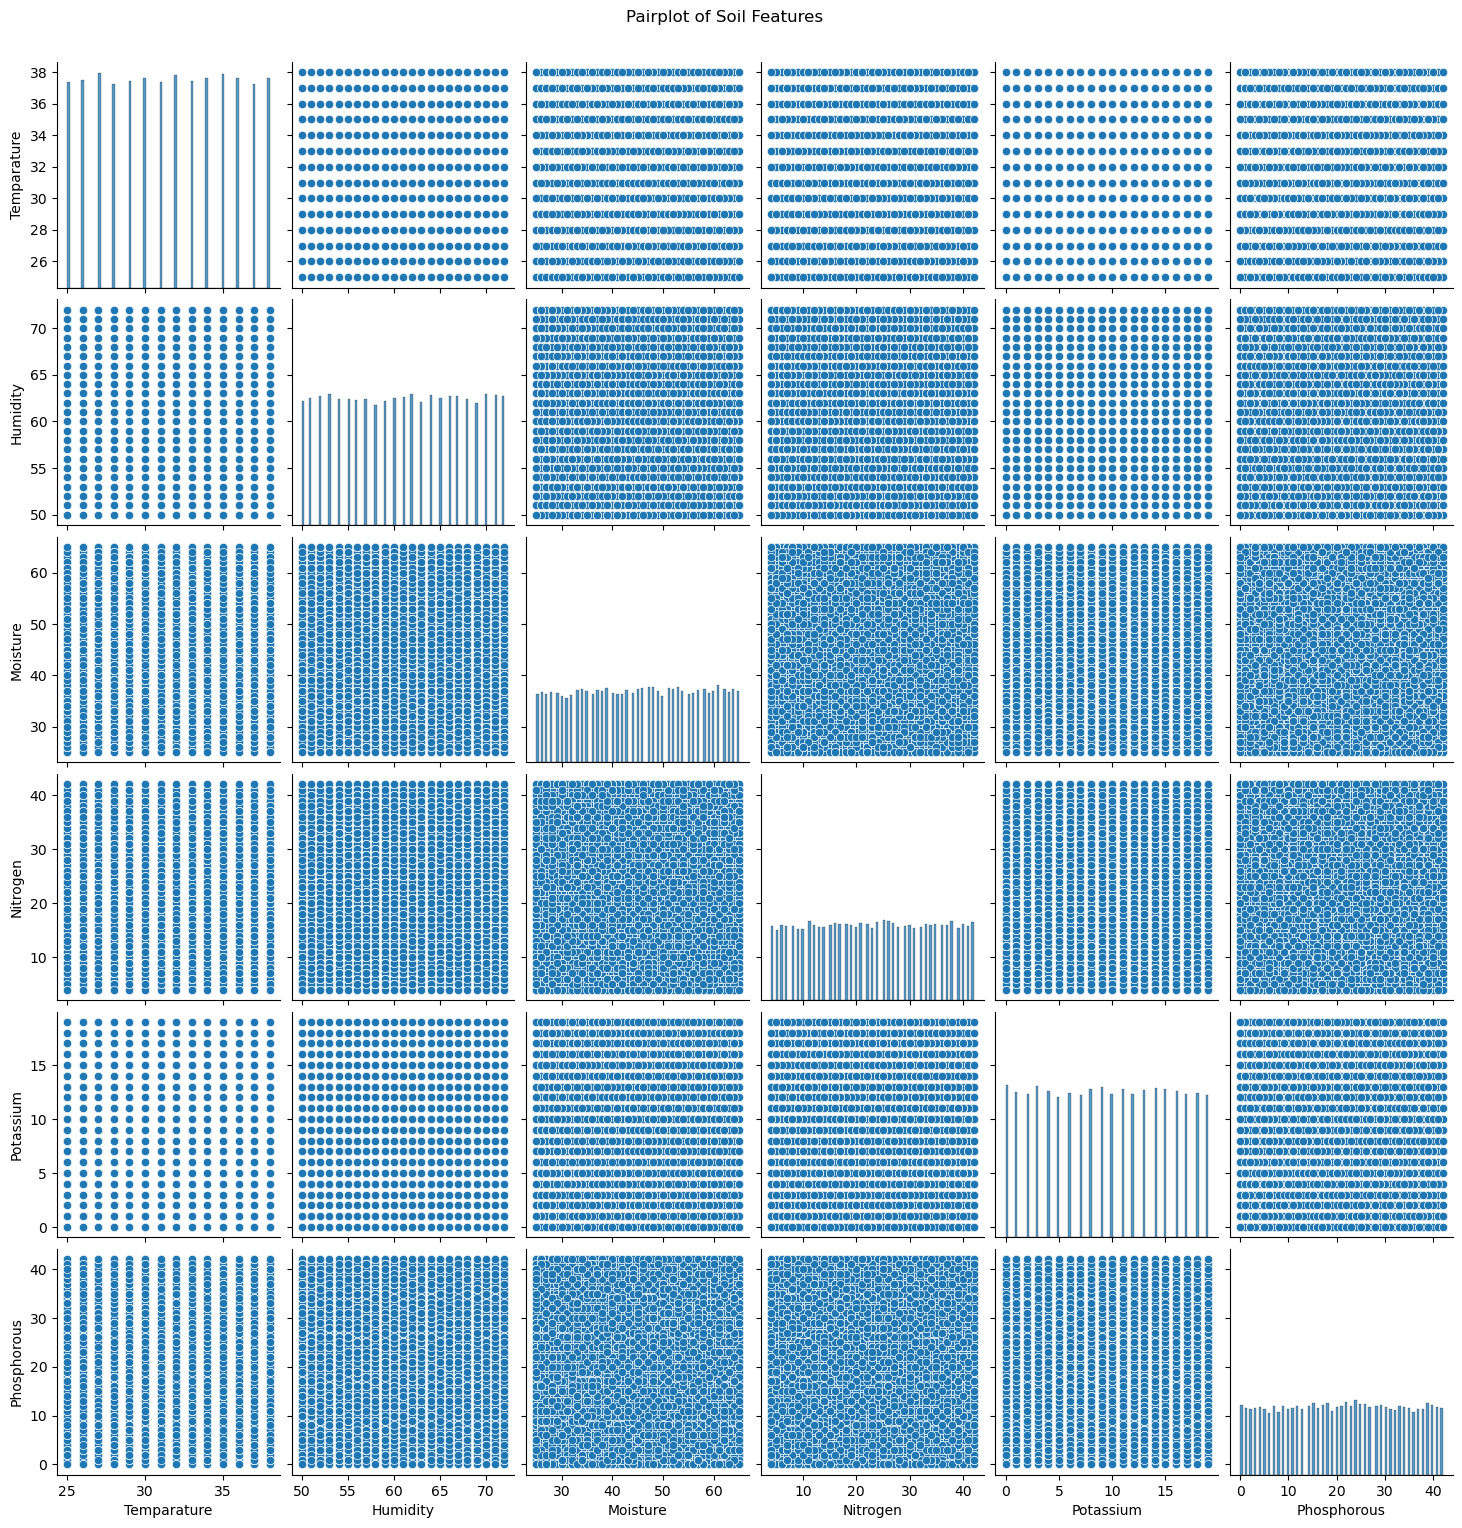

In [39]:
sns.pairplot(df_train[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']])
plt.suptitle("Pairplot of Soil Features", y=1.02)
plt.show()

In [40]:
def plot_boxplots_against_categorical(df, categorical_col):
    num_cols = df.select_dtypes(include=['number']).columns.drop('id', errors='ignore')

    for col in num_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=categorical_col, y=col)
        plt.title(f'{col} vs {categorical_col}', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout

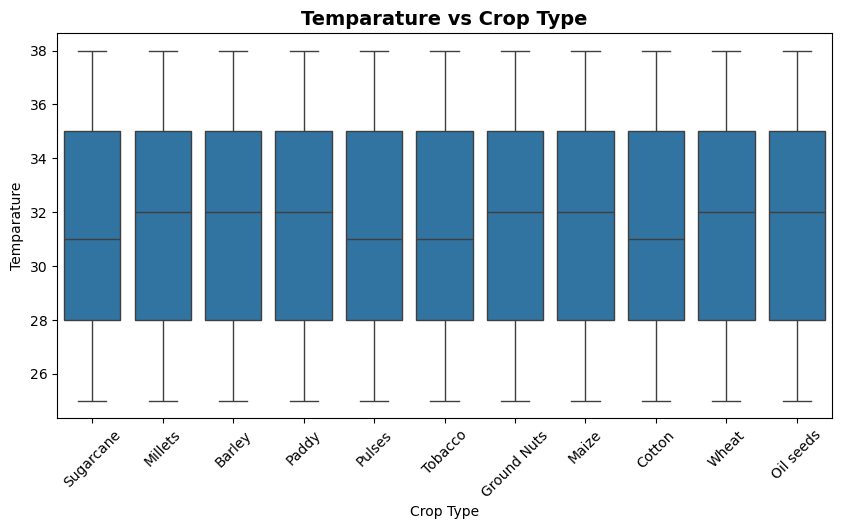

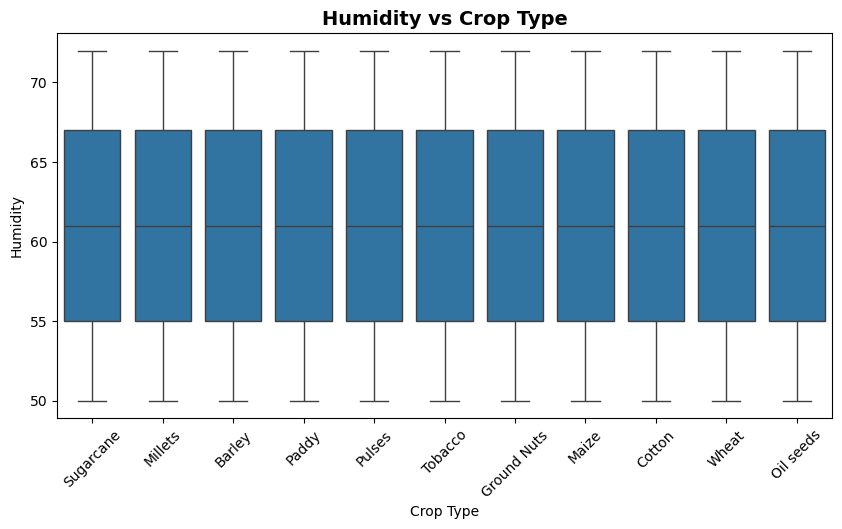

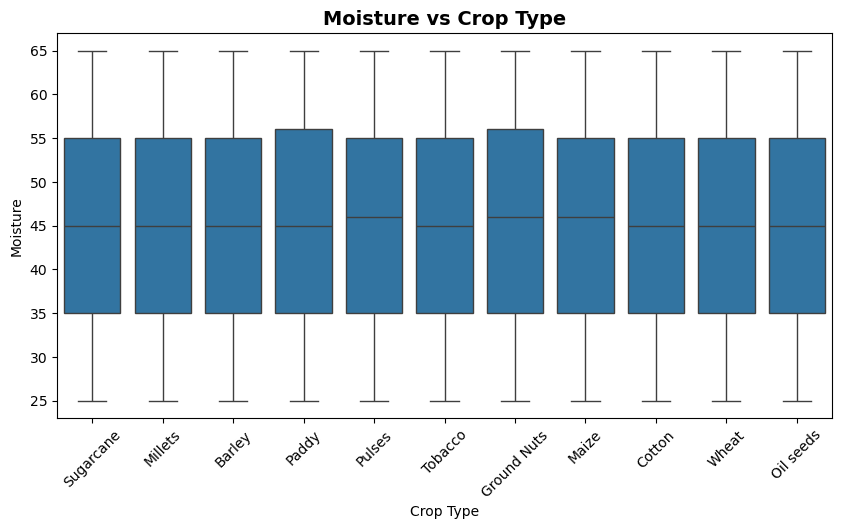

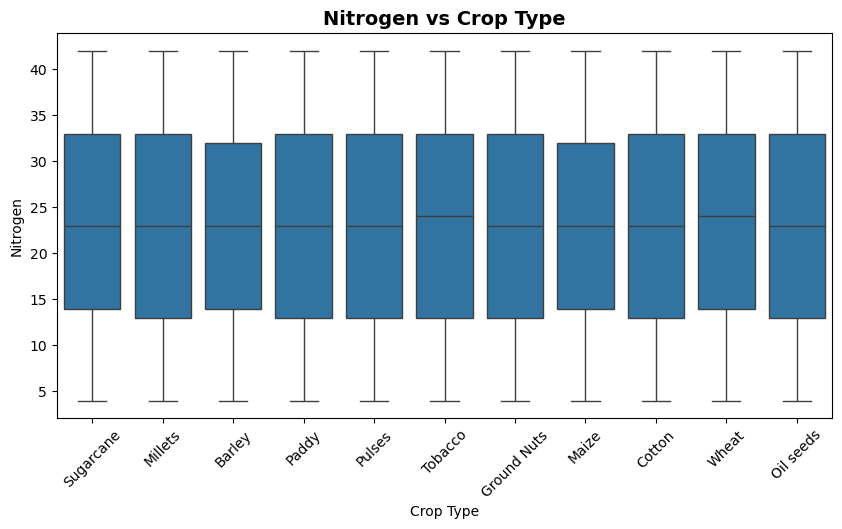

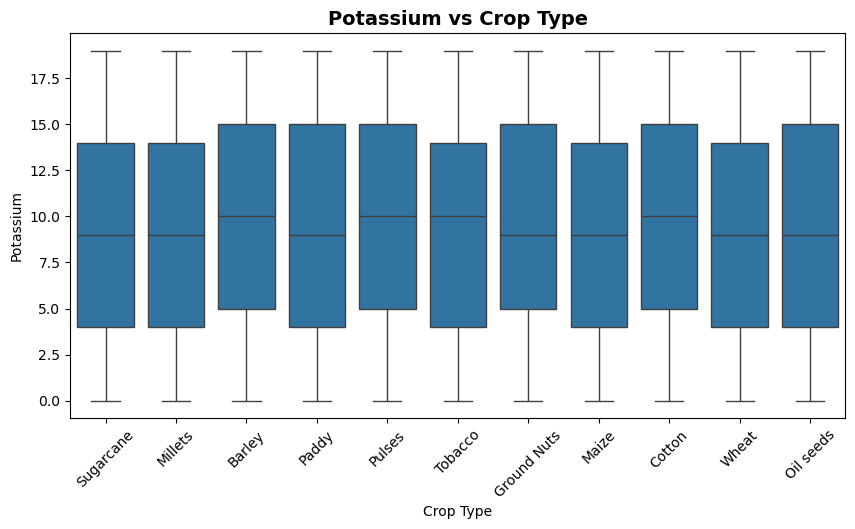

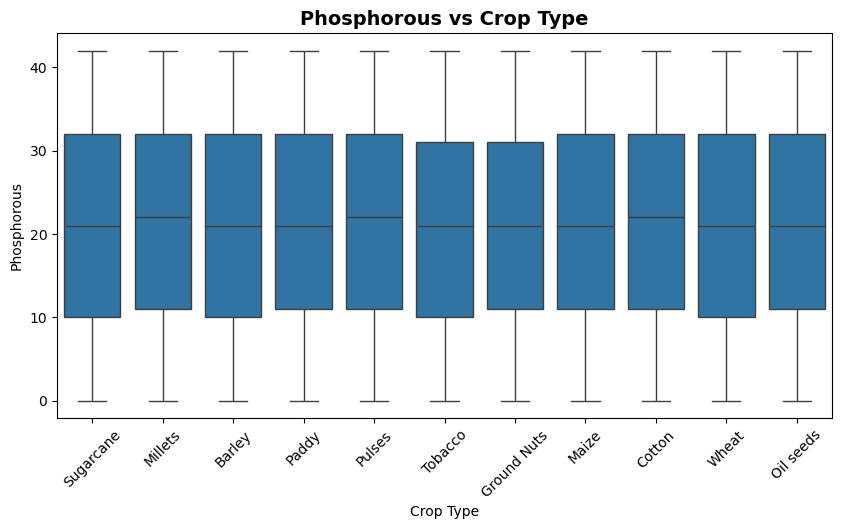

In [41]:
plot_boxplots_against_categorical(df_train, 'Crop Type')

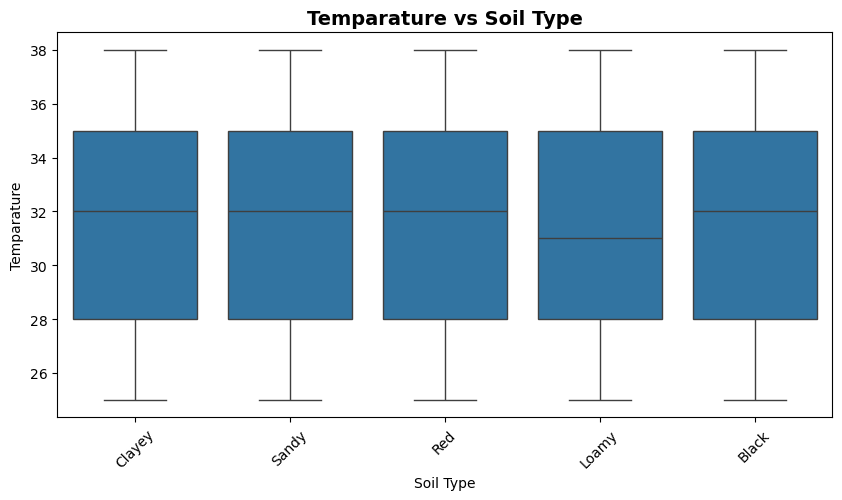

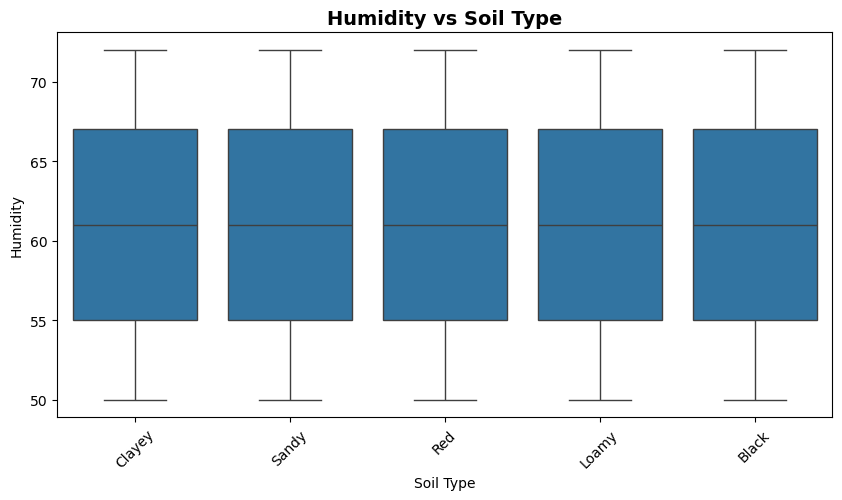

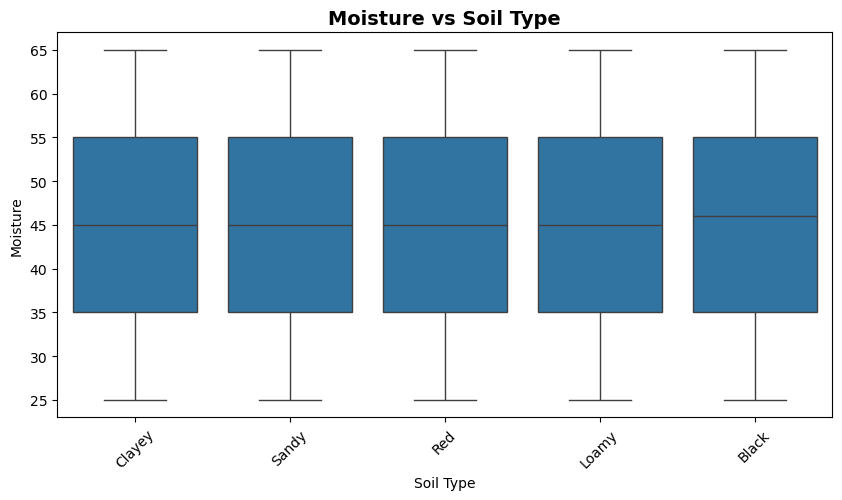

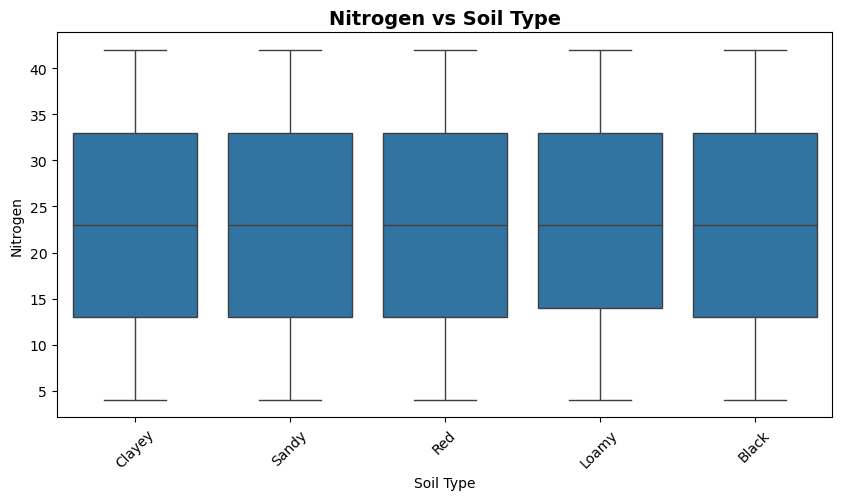

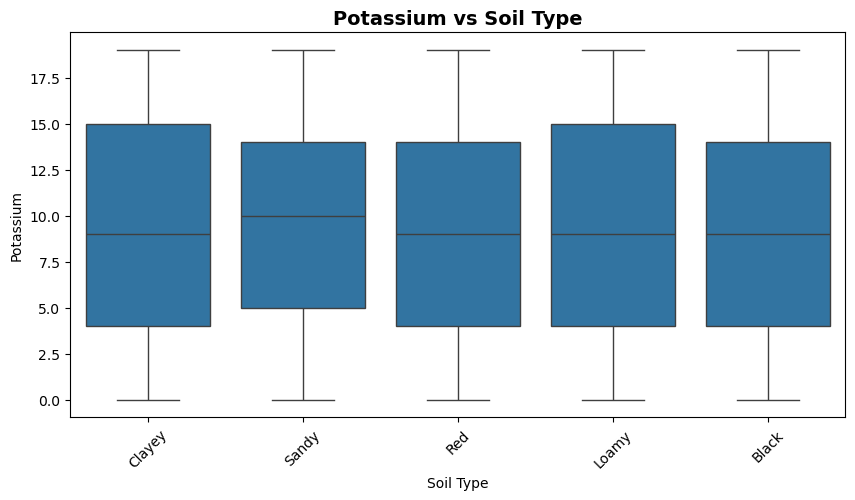

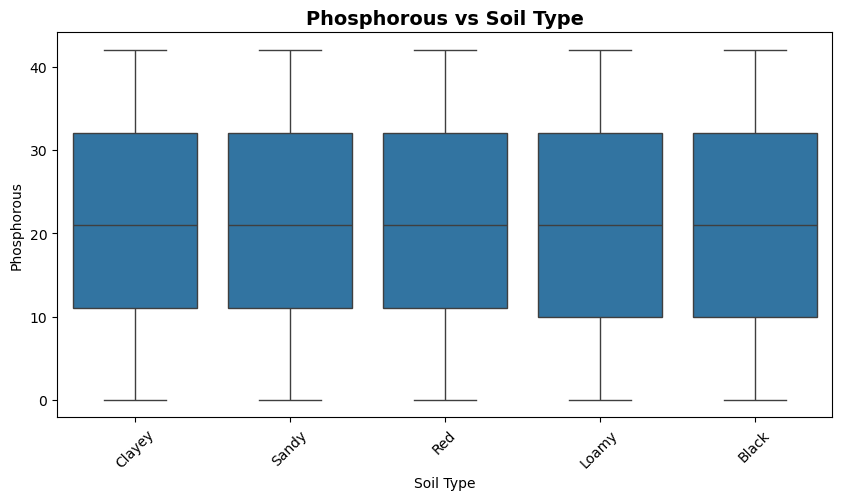

In [42]:
plot_boxplots_against_categorical(df_train, 'Soil Type')

In [51]:
for col in ['Soil Type','Crop Type','Fertilizer Name']:
    print(col, df_train[col].value_counts(dropna=False))

Soil Type Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64
Crop Type Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
Fertilizer Name Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64
